In [99]:
# stdlib imports
import os
from pathlib import Path
from datetime import timedelta

# external imports
import pandas as pd
import matplotlib.pyplot as plt

In [100]:
RUNS = ['WCP', 'LEJOG']

# length of each run (miles)
LENGTHS = {
    'WCP': 870,
    'LEJOG': 874
}

# target lengths
TARGETS = [365,350,300,250,200,150]

# how many miles should we run each day for the given target?
RATES = {}
for run in RUNS:
    RATES[run] = {}
    for target in TARGETS:
        RATES[run][target] = LENGTHS[run]/target

In [101]:
# all the data is in the dropbox
DATA_FILE = Path.home() / 'Dropbox' / 'home' / 'shared' / 'martin' / 'WCP.xlsx'
DATA_FILE

PosixPath('/Users/martinchorley/Dropbox/home/shared/martin/WCP.xlsx')

In [102]:
# let's read in the run data
run_data = pd.read_excel(DATA_FILE, sheet_name=['WCP', 'LEJOG'], header=1)
run_data

{'WCP':      Day       Date  Mileage  Cumulative  Daily Rate  Remaining  \
 0      1 2020-06-15     0.00        0.00    0.000000     870.00   
 1      2 2020-06-16     6.29        6.29    3.145000     863.71   
 2      3 2020-06-17     0.00        6.29    2.096667     863.71   
 3      4 2020-06-18     3.71       10.00    2.500000     860.00   
 4      5 2020-06-19     2.85       12.85    2.570000     857.15   
 ..   ...        ...      ...         ...         ...        ...   
 361  362 2021-06-11      NaN      104.28    0.288066     765.72   
 362  363 2021-06-12      NaN      104.28    0.287273     765.72   
 363  364 2021-06-13      NaN      104.28    0.286484     765.72   
 364  365 2021-06-14      NaN      104.28    0.285699     765.72   
 365  366 2021-06-15      NaN      104.28    0.284918     765.72   
 
      Pace Required  Variance  
 0         2.390110 -2.390110  
 1         2.379366  0.765634  
 2         2.385939 -0.289273  
 3         2.382271  0.117729  
 4         2.38

In [103]:
# drop the days we didn't run (or haven't run yet)
for run in RUNS:
    run_data[run] = run_data[run].dropna()
    
run_data

{'WCP':     Day       Date  Mileage  Cumulative  Daily Rate  Remaining  Pace Required  \
 0     1 2020-06-15     0.00        0.00    0.000000     870.00       2.390110   
 1     2 2020-06-16     6.29        6.29    3.145000     863.71       2.379366   
 2     3 2020-06-17     0.00        6.29    2.096667     863.71       2.385939   
 3     4 2020-06-18     3.71       10.00    2.500000     860.00       2.382271   
 4     5 2020-06-19     2.85       12.85    2.570000     857.15       2.380972   
 5     6 2020-06-20     3.78       16.63    2.771667     853.37       2.377075   
 6     7 2020-06-21     0.00       16.63    2.375714     853.37       2.383715   
 7     8 2020-06-22     9.92       26.55    3.318750     843.45       2.362605   
 8     9 2020-06-23     0.00       26.55    2.950000     843.45       2.369242   
 9    10 2020-06-24     4.42       30.97    3.097000     839.03       2.363465   
 10   11 2020-06-25     0.00       30.97    2.815455     839.03       2.370141   
 11   12 

In [104]:
# how many miles have we got left to do, and how many are we doing on average every day

CURRENT_RATES = {}
REMAINING = {}

for run in RUNS:
    last_run = run_data[run].iloc[-1]
    CURRENT_RATES[run] = last_run['Cumulative']/last_run['Day']
    REMAINING[run] = LENGTHS[run] - last_run['Cumulative']
    
print(CURRENT_RATES)
print(REMAINING)

{'WCP': 3.0670588235294116, 'LEJOG': 3.2228571428571433}
{'WCP': 765.72, 'LEJOG': 851.44}


In [105]:
DAYS_TO_FINISH = {}
for run in RUNS:
    DAYS_TO_FINISH[run] = REMAINING[run] / CURRENT_RATES[run]
print(DAYS_TO_FINISH)

{'WCP': 249.65937859608746, 'LEJOG': 264.18794326241135}


In [106]:
PROJECTED_END = {}
for run in RUNS:
    first_run = run_data[run].iloc[0]
    start_date = first_run['Date']
    PROJECTED_END[run] = (start_date + timedelta(days=DAYS_TO_FINISH[run])).date()
print(PROJECTED_END)

{'WCP': datetime.date(2021, 2, 19), 'LEJOG': datetime.date(2021, 4, 3)}


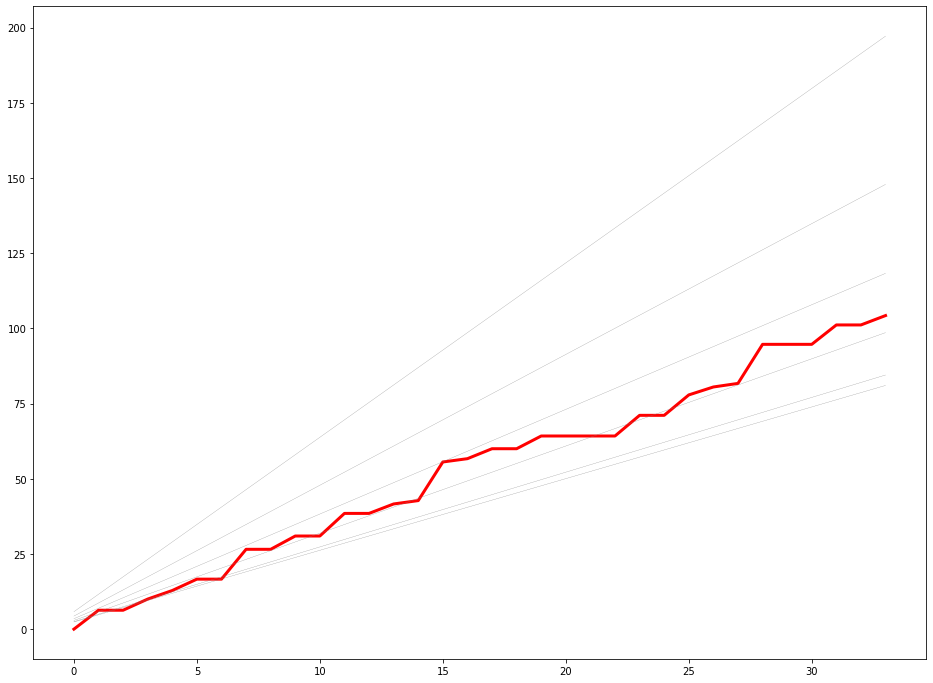

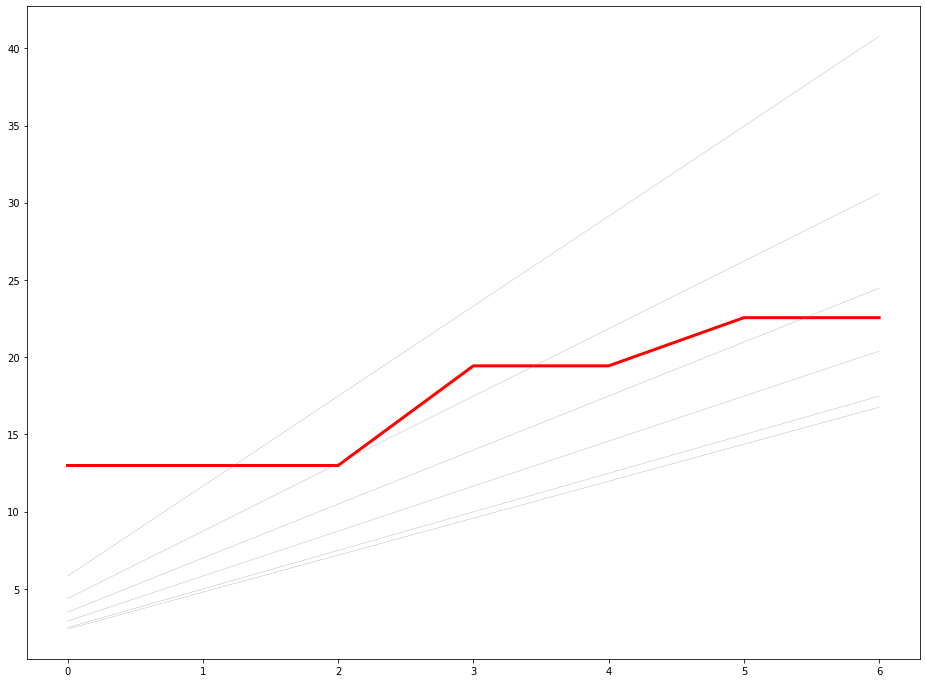

In [107]:
for run in RUNS:
    fig, ax = plt.subplots(figsize=[16,12])
    plt.plot(run_data[run]['Cumulative'], color='red', linewidth=3)
    for key, rate in RATES[run].items():
        plt.plot([rate*y for y in range(1,run_data[run].iloc[-1]['Day']+1)], label=key, linewidth=0.25, color='gray')

In [109]:
for run in RUNS:
    for key, rate in RATES[run].items():
        run_data[run][key] = run_data[run]['Day'] * rate
        
print(run_data)

for run in RUNS:
    with open('{}.csv'.format(run)) as output_file:
        run_data[run].to_csv(output_file)

{'WCP':     Day       Date  Mileage  Cumulative  Daily Rate  Remaining  Pace Required  \
0     1 2020-06-15     0.00        0.00    0.000000     870.00       2.390110   
1     2 2020-06-16     6.29        6.29    3.145000     863.71       2.379366   
2     3 2020-06-17     0.00        6.29    2.096667     863.71       2.385939   
3     4 2020-06-18     3.71       10.00    2.500000     860.00       2.382271   
4     5 2020-06-19     2.85       12.85    2.570000     857.15       2.380972   
5     6 2020-06-20     3.78       16.63    2.771667     853.37       2.377075   
6     7 2020-06-21     0.00       16.63    2.375714     853.37       2.383715   
7     8 2020-06-22     9.92       26.55    3.318750     843.45       2.362605   
8     9 2020-06-23     0.00       26.55    2.950000     843.45       2.369242   
9    10 2020-06-24     4.42       30.97    3.097000     839.03       2.363465   
10   11 2020-06-25     0.00       30.97    2.815455     839.03       2.370141   
11   12 2020-06-26  

FileNotFoundError: [Errno 2] No such file or directory: 'WCP.csv'